# Recurrent Neural Network to Predict Stock Prices

## Background

This study is based on a paper from Stanford University.

http://cs229.stanford.edu/proj2012/BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf

## Data

https://finance.yahoo.com/quote/TSLA/history?p=TSLA

## Introduction

Recurrent Neural Networks are excellent to use along with time series analysis to predict stock prices. What is time series analysis? Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

An example is this. Would today affect the stock prices of tomorrow? Would last week affect the stock prices of tomorrow? How about last month? Last year? Seasons or fiscal quarters? Decades? Although stock advisors may have different opinions, recurrent neural networks uses every single case and finds the best method to predict.

Problem: Client wants to know when to invest to get largest return in 2017.

Data: 5 years of Tesla stock prices. (2012-2017)

Solution: Use recurrent neural networks to predict Tesla stock prices in 2017 using data from 2012-2016.

## Data Visualization

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [3]:
# Reading CSV file into training set
training_set = pd.read_csv('C:/git/pythonML/pythonML/notebooks/Recurrent-Neural-Network-to-Predict-Stock-Prices/TSLA_2012-2016.csv')
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
1,2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
2,2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
3,2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
4,2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


In [4]:
training_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,159.989491,162.793354,157.018482,159.946224,159.946224,5.101530e+06
std,84.557575,85.742714,83.246223,84.517502,84.517502,4.517660e+06
min,26.620001,26.850000,22.639999,22.790001,22.790001,3.649000e+05
25%,42.015000,42.780000,40.985000,41.897500,41.897500,2.118800e+06
50%,197.055001,200.620002,193.544998,197.135002,197.135002,4.011550e+06
75%,226.072498,229.674999,221.515003,225.382496,225.382496,6.490300e+06
max,287.670013,291.420013,280.399994,286.040009,286.040009,3.716390e+07


In [5]:
# Reading CSV file into test set
test_set = pd.read_csv('C:/git/pythonML/pythonML/notebooks/Recurrent-Neural-Network-to-Predict-Stock-Prices/TSLA_2017.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,214.860001,220.330002,210.960007,216.990005,216.990005,5923300
1,2017-01-04,214.750000,228.000000,214.309998,226.990005,226.990005,11213500
2,2017-01-05,226.419998,227.479996,221.949997,226.750000,226.750000,5911700
3,2017-01-06,226.929993,230.309998,225.449997,229.009995,229.009995,5527900
4,2017-01-09,228.970001,231.919998,228.000000,231.279999,231.279999,3957000


In [6]:
test_set.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,314.296215,318.450598,309.686972,314.316295,314.316295,6.334172e+06
std,41.714910,41.883952,40.500712,40.966316,40.966316,2.888997e+06
min,214.750000,220.330002,210.960007,216.990005,216.990005,2.186700e+06
25%,291.800003,299.919998,287.669999,295.229995,295.229995,4.320200e+06
50%,317.279999,321.989990,313.149994,317.549988,317.549988,5.672300e+06
75%,348.134995,351.619995,341.929993,347.205001,347.205001,7.511750e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,1.979140e+07


## Data Preprocessing

Here, we are only interested in the opening price of the stock, so we just get that feature out.

In [7]:
# Getting relevant feature
training_set = training_set.iloc[:,1:2]
training_set.head()

,Open
0,28.940001
1,28.209999
2,27.760000
3,27.200001
4,27.000000


In [8]:
# Converting to 2D array
training_set = training_set.values
training_set

array([[ 28.940001],
       [ 28.209999],
       [ 27.76    ],
       ...,
       [221.529999],
       [218.559998],
       [216.300003]])

Scaling our features using normalization

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.00888719],
       [0.00609078],
       [0.00436698],
       ...,
       [0.74663853],
       [0.7352614 ],
       [0.72660407]])

Now we split our stock prices by shifting the cells one block. That way, the input would be one day and the output would be the very next day.

In [10]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Example
today = pd.DataFrame(X_train[0:5])
tomorrow = pd.DataFrame(y_train[0:5])
ex = pd.concat([today, tomorrow], axis=1)
ex.columns = (['today', 'tomorrow'])
ex

,today,tomorrow
0,0.008887,0.006091
1,0.006091,0.004367
2,0.004367,0.002222
3,0.002222,0.001456
4,0.001456,0.003141


We reshape our data into 3 dimensions, [batch_size, timesteps, input_dim], for Keras package data processing.

Our batch size will be 1257 for the amount of data we have. Our timesteps will be 1 for each day. Our input will be 1 for one data point per observation.

In [11]:
# Reshaping into required shape for Keras
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[0.00888719]],

       [[0.00609078]],

       [[0.00436698]],

       ...,

       [[0.72116451]],

       [[0.74663853]],

       [[0.7352614 ]]])

# Building the Recurrent Neural Network

We import the Keras Sqeuential model since our recurrent neural network will be in order. We import the Dense layers since we will use it for the nodes. We finally used the LSTM layer for time series analysis.

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


We call our recurrent neural network a regressor since we are predicting using regression, not classification.

In [13]:
# Initializing the Recurrent Neural Network
regressor = Sequential()

Now we add the input layer with a sigmoid activation function. We use none then 1 for our input shape since we don't know what time step to use yet but we do know that each day contains one input.

In [14]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

Our output layer will return the predicted stock price for the next day.

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [16]:
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
# Fitting the Recurrent Neural Network to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 741us/step - loss: 0.2060
Epoch 2/200
1257/1257 [==============================] - 0s 66us/step - loss: 0.1544
Epoch 3/200
1257/1257 [==============================] - 0s 65us/step - loss: 0.1236
Epoch 4/200
1257/1257 [==============================] - 0s 66us/step - loss: 0.1072
Epoch 5/200
1257/1257 [==============================] - 0s 69us/step - loss: 0.0990
Epoch 6/200
1257/1257 [==============================] - 0s 69us/step - loss: 0.0950
Epoch 7/200
1257/1257 [==============================] - 0s 63us/step - loss: 0.0927
Epoch 8/200
1257/1257 [==============================] - 0s 67us/step - loss: 0.0909
Epoch 9/200
1257/1257 [==============================] - 0s 62us/step - loss: 0.0892
Epoch 10/200
1257/1257 [==============================] - 0s 79us/step - loss: 0.0876
Epoch 11/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0858
Epoch 12/200
1257/1257 [==============================] - 0s 6

# Making Predictions and Visualizing the Results

To test our recurrent neural network model, we take the real stock prices of 2017 and compare it with our model with predictions.

In [18]:
# Getting the real stock price of 2017
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,214.860001,220.330002,210.960007,216.990005,216.990005,5923300
1,2017-01-04,214.750000,228.000000,214.309998,226.990005,226.990005,11213500
2,2017-01-05,226.419998,227.479996,221.949997,226.750000,226.750000,5911700
3,2017-01-06,226.929993,230.309998,225.449997,229.009995,229.009995,5527900
4,2017-01-09,228.970001,231.919998,228.000000,231.279999,231.279999,3957000


In [19]:
# Getting relevant feature
real_stock_price = test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,214.860001
1,214.750000
2,226.419998
3,226.929993
4,228.970001


In [20]:
# Converting to 2D array
real_stock_price = real_stock_price.values

In [21]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (251 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

For 175 days, the predicted price is extremelly close.

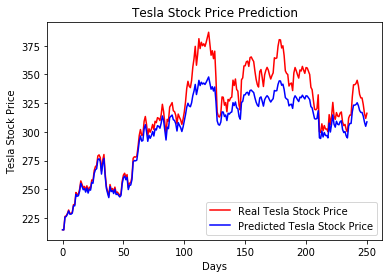

In [22]:
# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

Now we see if we can predict the past 5 years based on our model. At first it looks like the 'real tesla stock prices' isn't showing.

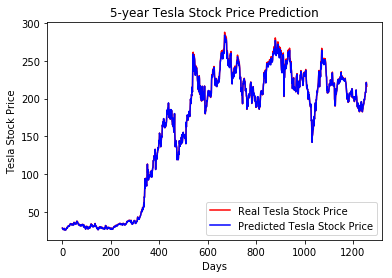

In [23]:
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('C:/git/pythonML/pythonML/notebooks/Recurrent-Neural-Network-to-Predict-Stock-Prices/TSLA_2012-2016.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

However, after splitting the data, we can see that our predictions were also extremelly accurate.

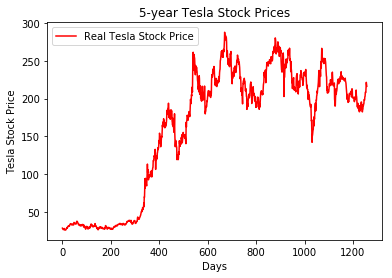

In [24]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.title('5-year Tesla Stock Prices')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

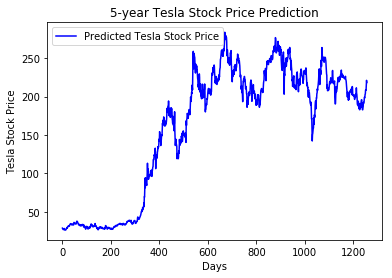

In [25]:
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()